<a href="https://colab.research.google.com/github/TheFox9711/MLPNS_LVolpi/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])
X

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

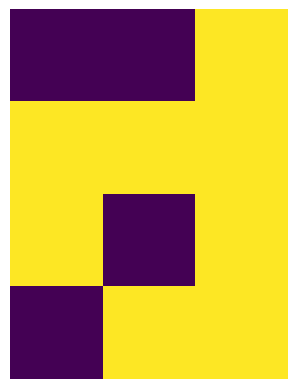

In [3]:
pl.imshow(X)
pl.axis('off');

In [4]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

Vogliamo predire y sulla base di X. Io ho:

In [5]:
'''
    input   |   output
    0 0 1   |      0
    1 1 1   |      1
    1 0 1   |      1
    0 1 1   |      0
''';

con i dati precedenti alleno la rete, poi dopo averlo fatto posso passare altri dati casuali e prevedere l'output.

# basic architecture: 1 layer
Ho:
> 4 osservazioni

> 3 neuroni

> 1 layer

In [5]:
# Funzione di attivazione:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

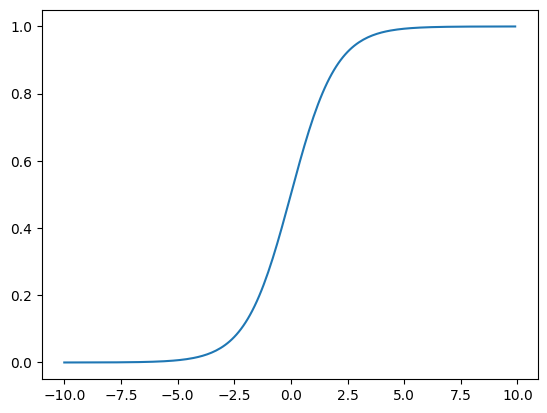

In [6]:
pl.plot(np.arange(-10, 10, 0.1), sigmoid(np.arange(-10, 10, 0.1)));

Devo conoscere la derivata della funzione di attivazione:

In [7]:
def dsigmoid(s):
    '''
    Derivata della sigmoide, s è la sigmoide cioè:
        d / dx (s) = s * (1 - s)
    '''
    return s * (1. - s)

In [8]:
# Usiamo come loss function la L1
def loss(target, prediction):
    return target - prediction

# Neural network

In [9]:
np.random.seed(302)

training = 10**4

# Creiamo l'unico layer
# 4x3 3x1 = 4x1  (nel senso della moltiplicazione tra matrici)

syn0 = 2 * np.random.random((3,1)) - 1
syn0

array([[ 0.27256242],
       [ 0.65008468],
       [-0.31671053]])

In [10]:
loss_output = []

for iter in range(training):
    inputLayer = X

    # Forward propagation
    l1 = np.dot(inputLayer, syn0)
    output = sigmoid(l1)  # Mettiamo un bias = 0

    output_error = loss(y, output)
    loss_output.append(np.abs(output_error).sum())
    output_delta = output_error * dsigmoid(output)

    # Applichiamo la correzione
    syn0 += np.dot(inputLayer.T, output_delta)

In [11]:
print('Output after training\n', output)
print('Output target\n', y)

Output after training
 [[0.00966505]
 [0.99211929]
 [0.9935895 ]
 [0.0078646 ]]
Output target
 [[0]
 [1]
 [1]
 [0]]


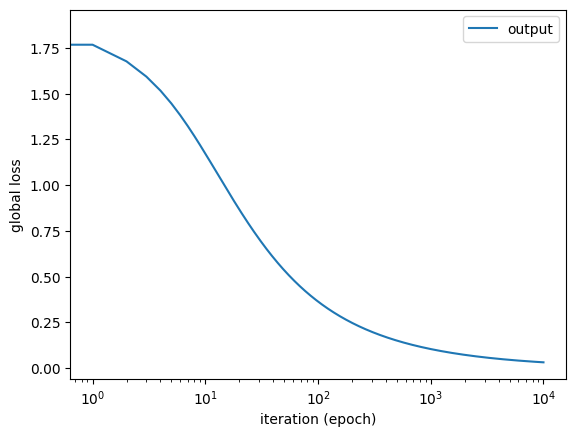

In [12]:
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('global loss')
pl.xscale('log');

Dal grafico capiamo che i neuroni smettono di imparare abbastanza rapidamente.

# Second layer
Creiamo un secondo layer nascosto, questo con 5 neuroni.

In [19]:
np.random.seed(302)

training = 10**4

# Pesi input-layer1
syn0 = 2 * np.random.random((3,5)) - 1
# Pesi layer1-layer2
syn1 = 2 * np.random.random((5,1)) - 1

print(syn0)
print(syn1)

[[ 0.27256242  0.65008468 -0.31671053  0.47927851 -0.06168623]
 [ 0.08558127  0.09133313 -0.7367975  -0.69357809 -0.48670618]
 [-0.12373802 -0.92147466  0.52732938  0.65817185 -0.50538898]]
[[-0.87028362]
 [-0.41574766]
 [ 0.02781874]
 [-0.38836983]
 [-0.74550884]]


In [20]:
loss_hidden = []
loss_output = []

for iter in range(training):
    inputLayer = X

    # Forward propagation
    l1 = np.dot(inputLayer, syn0)
    hidden = sigmoid(l1)  # Mettiamo un bias = 0

    l2 = np.dot(hidden, syn1)
    output = sigmoid(l2)

    # Bacward propagation
    output_error = loss(y, output)
    loss_output.append(np.abs(output_error).sum())

    output_delta = output_error * dsigmoid(output)

    hidden_error = output_delta.dot(syn1.T)
    loss_hidden.append(np.abs(hidden_error).sum())

    hidden_delta = hidden_error * dsigmoid(hidden)

    syn0 += np.dot(inputLayer.T, hidden_delta)
    syn1 += np.dot(hidden.T, output_delta)

In [21]:
print('Output after training\n', output)
print('Output target\n', y)

Output after training
 [[0.00489045]
 [0.99523858]
 [0.99564343]
 [0.00371098]]
Output target
 [[0]
 [1]
 [1]
 [0]]


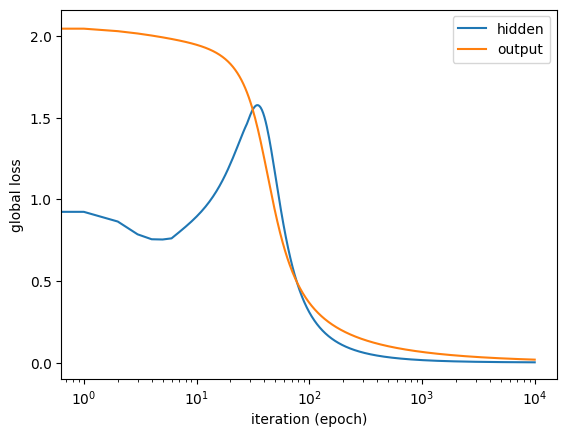

In [22]:
pl.plot(loss_hidden, label='hidden')
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('global loss')
pl.xscale('log')